#### Importing libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Parsing Data

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/kennedyuche/linear-regression/main/housing_price_dataset.csv")

In [61]:
data.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


#### Preparing the data

In [21]:
y_train = data["Price"]
x_train = data[["Bedrooms"]]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size= 0.2,  random_state = 42)  # 20% for testing and 80 for training

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r_2 = r2_score(y_test, y_predict)

#### Getting the results

In [39]:
print(f"The mean squared error: {mse}")
print(f"The r2_score: {r_2}")
print(f"The slope: {round(model.coef_[0], 2)}")
print(f"The Intercept: {round(model.intercept_,2)}")

The mean squared error: 5720920211.157944
The r2_score: 0.00331590688058081
The slope: 5181.04
The Intercept: 206645.98


In [41]:
regr_plot = data[['Bedrooms', 'Price']]
regr_plot_sample = regr_plot.sample(15, random_state = 2)

<Axes: xlabel='Bedrooms', ylabel='Price'>

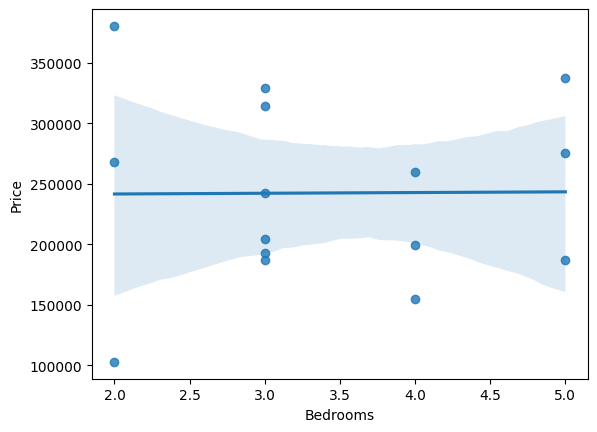

In [44]:
sns.regplot(data = regr_plot_sample, x = "Bedrooms", y = "Price")

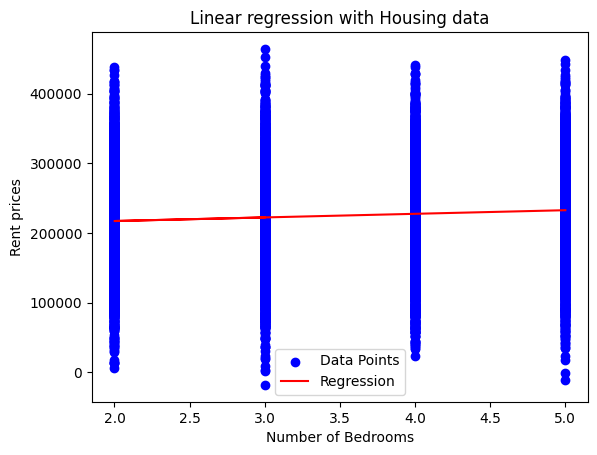

In [53]:
plt.scatter(x_test, y_test, color =  "blue", label = "Data Points")
plt.plot(x_test, y_predict, color = "red", label = "Regression")
plt.title("Linear regression with Housing data")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent prices")
plt.legend()
plt.show()

#### Performance of model vs residual analysis

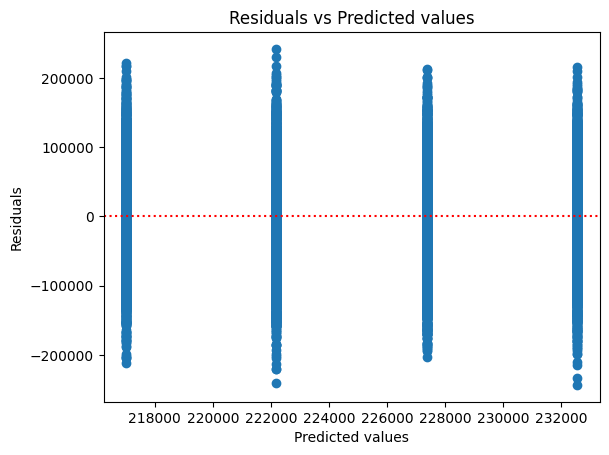

In [59]:
residual = y_test - y_predict
plt.scatter(y_predict, residual)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
plt.axhline(y = 0, color = "red", linestyle = "dotted")
